In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
import pandas as pd
import pandas as pd
#Univariate Analysis
#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import warnings; warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\ADMIN\Downloads\AH.csv')

In [3]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
#Missing value analysis 

In [6]:
# List of normalized Missing values 
#Step 1 Count missing values 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        data_type = df.dtypes
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent,data_type], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values',2:'Data_Types'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [7]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [8]:
df_missing= missing_values_table(df)
df_missing

Your selected dataframe has 82 columns.
There are 27 columns that have missing values.


,Missing Values,% of Total Values,Data_Types
Pool QC,2917,99.6,object
Misc Feature,2824,96.4,object
Alley,2732,93.2,object
Fence,2358,80.5,object
Fireplace Qu,1422,48.5,object
Lot Frontage,490,16.7,float64
Garage Cond,159,5.4,object
Garage Qual,159,5.4,object
Garage Finish,159,5.4,object
Garage Yr Blt,159,5.4,float64


In [5]:
#lets drop more % missing values
df.drop('Pool QC',inplace=True,axis=1)
df.drop('Misc Feature',inplace=True,axis=1)
df.drop('Alley',inplace=True,axis=1)
df.drop('Fence',inplace=True,axis=1)

In [10]:
df.shape

(2930, 78)

In [6]:
df['Fireplace Qu'].value_counts()

Gd    744
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [7]:
df['Fireplace Qu'].fillna(df['Fireplace Qu'].mode()[0], axis=0,inplace=True)

In [8]:
df['Fireplace Qu'].value_counts()

Gd    2166
TA     600
Fa      75
Po      46
Ex      43
Name: Fireplace Qu, dtype: int64

In [9]:
df['Lot Frontage'].mean()

69.22459016393442

In [10]:
df['Lot Frontage'].fillna(df['Lot Frontage'].mean(), axis=0,inplace=True)

In [11]:
df['Garage Cond'].unique()

array(['TA', nan, 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [12]:
df['Garage Cond'].value_counts()

TA    2665
Fa      74
Gd      15
Po      14
Ex       3
Name: Garage Cond, dtype: int64

In [13]:
df['Garage Cond'].fillna(df['Garage Cond'].mode()[0], axis=0,inplace=True)

In [14]:
df['Garage Qual'].fillna(df['Garage Qual'].mode()[0], axis=0,inplace=True)
df['Garage Finish'].fillna(df['Garage Finish'].mode()[0], axis=0,inplace=True)
df['Garage Type'].fillna(df['Garage Type'].mode()[0], axis=0,inplace=True)
df['Bsmt Exposure'].fillna(df['Bsmt Exposure'].mode()[0], axis=0,inplace=True)
df['BsmtFin Type 2'].fillna(df['BsmtFin Type 2'].mode()[0], axis=0,inplace=True)


In [15]:
df['Bsmt Qual'].fillna(df['Bsmt Qual'].mode()[0], axis=0,inplace=True)
df['Bsmt Cond'].fillna(df['Bsmt Cond'].mode()[0], axis=0,inplace=True)
df['BsmtFin Type 1'].fillna(df['BsmtFin Type 1'].mode()[0], axis=0,inplace=True)
df['Mas Vnr Type'].fillna(df['Mas Vnr Type'].mode()[0], axis=0,inplace=True)
df['Electrical'].fillna(df['Electrical'].mode()[0], axis=0,inplace=True)

In [16]:
df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].mean(), axis=0,inplace=True)
df['Mas Vnr Area'].fillna(df['Mas Vnr Area'].mean(), axis=0,inplace=True)
df['Bsmt Full Bath'].fillna(df['Bsmt Full Bath'].mean(), axis=0,inplace=True)
df['Bsmt Half Bath'].fillna(df['Bsmt Half Bath'].mean(), axis=0,inplace=True)
df['BsmtFin SF 1'].fillna(df['BsmtFin SF 1'].mean(), axis=0,inplace=True)
df['BsmtFin SF 2'].fillna(df['BsmtFin SF 2'].mean(), axis=0,inplace=True)
df['Bsmt Unf SF'].fillna(df['Bsmt Unf SF'].mean(), axis=0,inplace=True)
df['Total Bsmt SF'].fillna(df['Total Bsmt SF'].mean(), axis=0,inplace=True)
df['Garage Cars'].fillna(df['Garage Cars'].mean(), axis=0,inplace=True)
df['Garage Area'].fillna(df['Garage Area'].mean(), axis=0,inplace=True)

In [22]:
df_missing= missing_values_table(df)
df_missing

Your selected dataframe has 78 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Data_Types


In [23]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Gd,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Gd,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


In [24]:
#Lets Seperate numerical and categorical values
#get list of all object type
print("List of integer values",list(df.select_dtypes(['int64']).columns))
print("List of Float values",list(df.select_dtypes(['float64']).columns))
print("List of Object values",list(df.select_dtypes(['object']).columns))
print("List of Date values",list(df.select_dtypes(['datetime64[ns]']).columns))

List of integer values ['Order', 'PID', 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']
List of Float values ['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area']
List of Object values ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtF

In [25]:
integer_value=[ 'MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']

In [26]:
Float_values = ['Lot Frontage', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Garage Yr Blt', 'Garage Cars', 'Garage Area']

In [27]:
Object_values = ['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition']

In [28]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

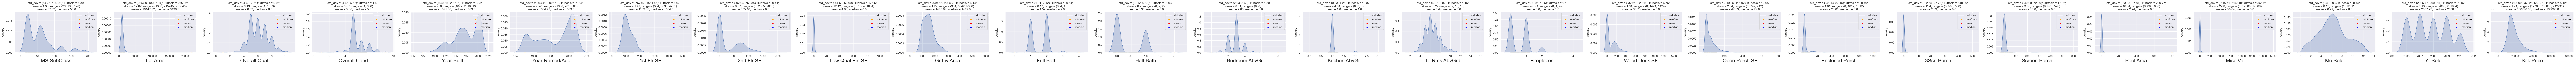

In [30]:
# Univariate Analysis
UVA_numeric(df,integer_value)

In [31]:
print(df['3Ssn Porch'].value_counts())
print(df['Yr Sold'].value_counts())
print(df['Pool Area'].value_counts())
print(df['Kitchen AbvGr'].value_counts())
print(df['Low Qual Fin SF'].value_counts())

0      2893
153       3
168       3
144       2
180       2
216       2
140       1
304       1
323       1
255       1
245       1
225       1
219       1
96        1
23        1
508       1
360       1
320       1
290       1
150       1
238       1
224       1
86        1
196       1
182       1
120       1
176       1
174       1
130       1
162       1
407       1
Name: 3Ssn Porch, dtype: int64
2007    694
2009    648
2006    625
2008    622
2010    341
Name: Yr Sold, dtype: int64
0      2917
144       1
228       1
368       1
444       1
480       1
512       1
576       1
648       1
738       1
800       1
519       1
555       1
561       1
Name: Pool Area, dtype: int64
1    2796
2     129
0       3
3       2
Name: Kitchen AbvGr, dtype: int64
0       2890
80         4
360        2
205        2
515        1
514        1
528        1
572        1
1064       1
53         1
259        1
513        1
512        1
397        1
431        1
473        1
479        1
481        1
371

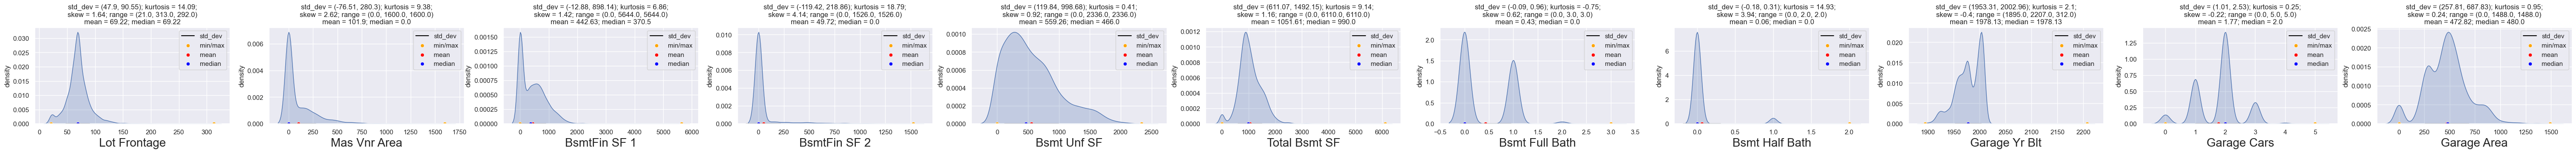

In [32]:
# Univariate Analysis
UVA_numeric(df,Float_values)

In [33]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

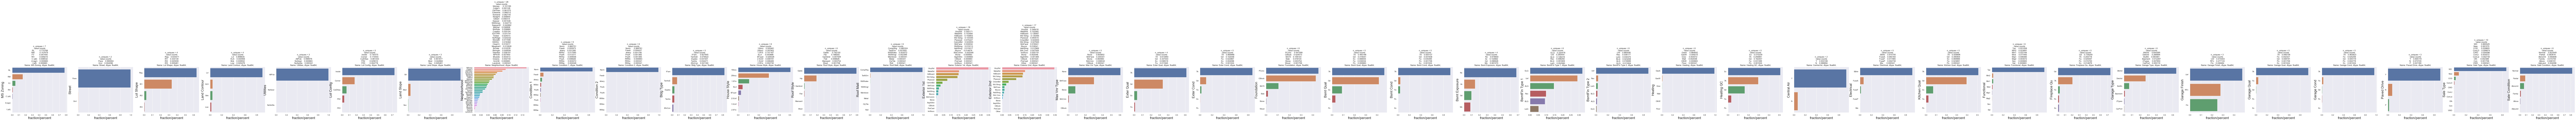

In [34]:
UVA_category(df,Object_values)

In [35]:
# checking out liers
#lets analyze outliers
# Outliers detection 
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


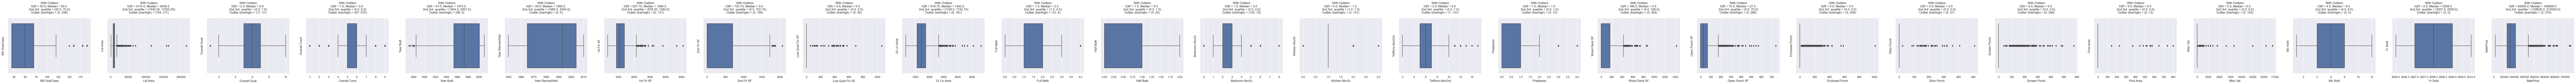

In [36]:
UVA_outlier(df, integer_value,)

True
True
True
True
True
True
True
True
True
True
True


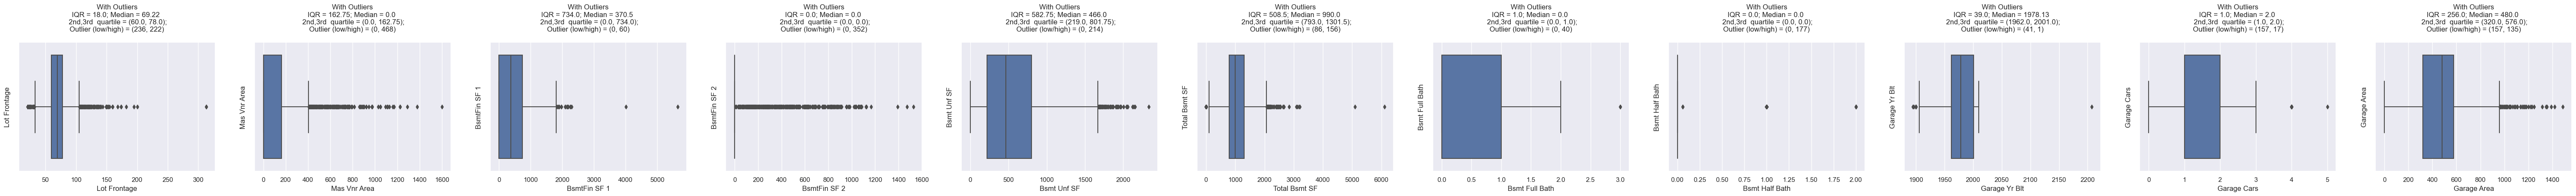

In [37]:
UVA_outlier(df, Float_values,)

In [38]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Gd,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Gd,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


In [51]:
df['Street'].value_counts()
df['Lot Shape'].value_counts()
df['Lot Shape'].value_counts()
df['Lot Shape'].value_counts()
df['Lot Shape'].value_counts()
df['Land Slope'].value_counts()
#Lot Config Land Slope Neighborhood

Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64

In [17]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Street']= label_encoder.fit_transform(df['Street'])
 
df['Street'].unique()

array([1, 0])

In [18]:
df['Lot Shape']= label_encoder.fit_transform(df['Lot Shape'])
 
df['Lot Shape'].unique()

array([0, 3, 1, 2])

In [19]:
df['Land Contour']= label_encoder.fit_transform(df['Land Contour'])
 
df['Land Contour'].unique()

array([3, 1, 0, 2])

In [20]:
df['Utilities']= label_encoder.fit_transform(df['Utilities'])
 
df['Utilities'].unique()


array([0, 2, 1])

In [21]:
df2 = df.copy()

In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Create some toy data in a Pandas dataframe
fruit_data = pd.DataFrame({
    'fruit':  ['apple','orange','pear','orange'],
    'color':  ['red','orange','green','green'],
    'weight': [5,6,3,4]
})

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [23]:
from sklearn.pipeline import Pipeline
encoding_pipeline = Pipeline([
    ('encoding',MultiColumnLabelEncoder(columns=['Condition 2', 'Bldg Type', 'Roof Style', 'Roof Matl', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Sale Type', 'Sale Condition']))
    # add more pipeline steps as needed
])
df2=encoding_pipeline.fit_transform(df2)

In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   int32  
 7   Lot Shape        2930 non-null   int32  
 8   Land Contour     2930 non-null   int32  
 9   Utilities        2930 non-null   int32  
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   int32  
 15  Bldg Type        2930 non-null   int32  
 16  House Style      2930 non-null   object 
 17  Overall Qual  

In [60]:
df2.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,1,0,3,0,Corner,Gtl,NAmes,Norm,2,0,1Story,6,5,1960,1960,3,1,BrkFace,Plywood,4,112.0,3,4,1,4,2,1,1,639.0,5,0.0,441.0,1080.0,1,1,1,4,1656,0,0,1656,1.0,0.0,1,0,3,1,4,7,7,2,2,1,1960.0,0,2.0,528.0,4,4,1,210,62,0,0,0,0,0,5,2010,9,4,215000
1,2,526350040,20,RH,80.0,11622,1,3,3,0,Inside,Gtl,NAmes,Feedr,2,0,1Story,5,6,1961,1961,1,1,VinylSd,VinylSd,3,0.0,3,4,1,4,4,3,4,468.0,3,144.0,270.0,882.0,1,4,1,4,896,0,0,896,0.0,0.0,1,0,2,1,4,5,7,0,2,1,1961.0,2,1.0,730.0,4,4,2,140,0,0,0,120,0,0,6,2010,9,4,105000
2,3,526351010,20,RL,81.0,14267,1,0,3,0,Corner,Gtl,NAmes,Norm,2,0,1Story,6,6,1958,1958,3,1,Wd Sdng,Wd Sdng,1,108.0,3,4,1,4,4,3,0,923.0,5,0.0,406.0,1329.0,1,4,1,4,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,7,0,2,1,1958.0,2,1.0,312.0,4,4,2,393,36,0,0,0,0,12500,6,2010,9,4,172000
3,4,526353030,20,RL,93.0,11160,1,3,3,0,Corner,Gtl,NAmes,Norm,2,0,1Story,7,5,1968,1968,3,1,BrkFace,BrkFace,3,0.0,2,4,1,4,4,3,0,1065.0,5,0.0,1045.0,2110.0,1,0,1,4,2110,0,0,2110,1.0,0.0,2,1,3,1,0,8,7,2,4,1,1968.0,0,2.0,522.0,4,4,2,0,0,0,0,0,0,0,4,2010,9,4,244000
4,5,527105010,60,RL,74.0,13830,1,0,3,0,Inside,Gtl,Gilbert,Norm,2,0,2Story,5,5,1997,1998,1,1,VinylSd,VinylSd,3,0.0,3,4,2,2,4,3,2,791.0,5,0.0,137.0,928.0,1,2,1,4,928,701,0,1629,0.0,0.0,2,1,3,1,4,6,7,1,4,1,1997.0,0,2.0,482.0,4,4,2,212,34,0,0,0,0,0,3,2010,9,4,189900


In [24]:
# frequency encode
df_frq_map=df2['Lot Config'].value_counts().to_dict() 
df2['Lot Config'] = df2['Lot Config'].map(df_frq_map)

In [25]:
# frequency encode
df_frq_map1=df2['Neighborhood'].value_counts().to_dict() 
df2['Neighborhood'] = df2['Neighborhood'].map(df_frq_map1)

df_frq_map2=df2['Condition 1'].value_counts().to_dict() 
df2['Condition 1'] = df2['Condition 1'].map(df_frq_map2)

df_frq_map3=df2['House Style'].value_counts().to_dict() 
df2['House Style'] = df2['House Style'].map(df_frq_map3)

df_frq_map4=df2['Exterior 1st'].value_counts().to_dict() 
df2['Exterior 1st'] = df2['Exterior 1st'].map(df_frq_map4)

df_frq_map5=df2['Exterior 2nd'].value_counts().to_dict() 
df2['Exterior 2nd'] = df2['Exterior 2nd'].map(df_frq_map5)



In [26]:
df_frq_map6=df2['Land Slope'].value_counts().to_dict() 
df2['Land Slope'] = df2['Land Slope'].map(df_frq_map6)

df_frq_map7=df2['MS Zoning'].value_counts().to_dict() 
df2['MS Zoning'] = df2['MS Zoning'].map(df_frq_map7)

In [27]:
df['Land Slope'].value_counts()

Gtl    2789
Mod     125
Sev      16
Name: Land Slope, dtype: int64

In [28]:
print("List of Object values",list(df2.select_dtypes(['object']).columns))

List of Object values []


In [29]:
df2.drop('Order',inplace=True,axis=1)
df2.drop('PID',inplace=True,axis=1)

In [30]:
df2.head()

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,20,2273,141.0,31770,1,0,3,0,511,2789,443,2522,2,0,1481,6,5,1960,1960,3,1,88,274,4,112.0,3,4,1,4,2,1,1,639.0,5,0.0,441.0,1080.0,1,1,1,4,1656,0,0,1656,1.0,0.0,1,0,3,1,4,7,7,2,2,1,1960.0,0,2.0,528.0,4,4,1,210,62,0,0,0,0,0,5,2010,9,4,215000
1,20,27,80.0,11622,1,3,3,0,2140,2789,443,164,2,0,1481,5,6,1961,1961,1,1,1026,1015,3,0.0,3,4,1,4,4,3,4,468.0,3,144.0,270.0,882.0,1,4,1,4,896,0,0,896,0.0,0.0,1,0,2,1,4,5,7,0,2,1,1961.0,2,1.0,730.0,4,4,2,140,0,0,0,120,0,0,6,2010,9,4,105000
2,20,2273,81.0,14267,1,0,3,0,511,2789,443,2522,2,0,1481,6,6,1958,1958,3,1,420,397,1,108.0,3,4,1,4,4,3,0,923.0,5,0.0,406.0,1329.0,1,4,1,4,1329,0,0,1329,0.0,0.0,1,1,3,1,2,6,7,0,2,1,1958.0,2,1.0,312.0,4,4,2,393,36,0,0,0,0,12500,6,2010,9,4,172000
3,20,2273,93.0,11160,1,3,3,0,511,2789,443,2522,2,0,1481,7,5,1968,1968,3,1,88,47,3,0.0,2,4,1,4,4,3,0,1065.0,5,0.0,1045.0,2110.0,1,0,1,4,2110,0,0,2110,1.0,0.0,2,1,3,1,0,8,7,2,4,1,1968.0,0,2.0,522.0,4,4,2,0,0,0,0,0,0,0,4,2010,9,4,244000
4,60,2273,74.0,13830,1,0,3,0,2140,2789,165,2522,2,0,873,5,5,1997,1998,1,1,1026,1015,3,0.0,3,4,2,2,4,3,2,791.0,5,0.0,137.0,928.0,1,2,1,4,928,701,0,1629,0.0,0.0,2,1,3,1,4,6,7,1,4,1,1997.0,0,2.0,482.0,4,4,2,212,34,0,0,0,0,0,3,2010,9,4,189900


In [37]:
df3=df2.copy()

# Outliers detection 

In [38]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data =df2['SalePrice']
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
age = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(age))

Identified outliers: 45
Non-outlier observations: 2885


In [39]:
# lets remove outliers 
df3.drop(df3[df3['Gr Liv Area'] > 2500].index, inplace = True)
df3.drop(df3[df3['Gr Liv Area'] < 334].index, inplace = True)
df3.drop(df3[df3['Lot Area'] > 15000].index, inplace = True)
df3.drop(df3[df3['Lot Area'] < 1300].index, inplace = True)
df3.drop(df3[df3['MS SubClass'] > 130].index, inplace = True)
df3.drop(df3[df3['MS SubClass'] < 20].index, inplace = True)
df3.drop(df3[df3['Overall Qual'] > 10].index, inplace = True)
df3.drop(df3[df3['Overall Qual'] < 2].index, inplace = True)

df3.drop(df3[df3['1st Flr SF'] > 2290].index, inplace = True)
df3.drop(df3[df3['1st Flr SF'] < 334].index, inplace = True)
df3.drop(df3[df3['2nd Flr SF'] > 1690].index, inplace = True)
df3.drop(df3[df3['2nd Flr SF'] < 0].index, inplace = True)
df3.drop(df3[df3['Low Qual Fin SF'] > 140].index, inplace = True)
df3.drop(df3[df3['Low Qual Fin SF'] < 0].index, inplace = True)
df3.drop(df3[df3['Kitchen AbvGr'] > 1].index, inplace = True)
df3.drop(df3[df3['Kitchen AbvGr'] < 1].index, inplace = True)

df3.drop(df3[df3['Fireplaces'] > 2].index, inplace = True)
df3.drop(df3[df3['Fireplaces'] < 0].index, inplace = True)
df3.drop(df3[df3['Wood Deck SF'] > 400].index, inplace = True)
df3.drop(df3[df3['Wood Deck SF'] < 0].index, inplace = True)
df3.drop(df3[df3['Open Porch SF'] > 200].index, inplace = True)
df3.drop(df3[df3['Open Porch SF'] < 0].index, inplace = True)
df3.drop(df3[df3['Enclosed Porch'] > 210].index, inplace = True)

df3.drop(df3[df3['Enclosed Porch'] < 0].index, inplace = True)
df3.drop(df3[df3['Year Built'] > 2010].index, inplace = True)
df3.drop(df3[df3['Year Built'] < 1885].index, inplace = True)
df3.drop(df3[df3['Screen Porch'] > 180].index, inplace = True)
df3.drop(df3[df3['Screen Porch'] < 0].index, inplace = True)
df3.drop(df3[df3['3Ssn Porch'] > 23].index, inplace = True)

df3.drop(df3[df3['3Ssn Porch'] < 0].index, inplace = True)
df3.drop(df3[df3['Misc Val'] > 1500].index, inplace = True)
df3.drop(df3[df3['Misc Val'] < 0].index, inplace = True)
df3.drop(df3[df3['SalePrice'] > 419005].index, inplace = True)
df3.drop(df3[df3['SalePrice'] < 12789].index, inplace = True)

In [41]:
df4=df3.copy()

In [42]:
df4.shape

(1954, 76)

In [43]:
# base line model
X = df4.drop(['SalePrice'],axis=1)
y = df4['SalePrice']
X.shape

(1954, 75)

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

# Linear regression

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [47]:
# Creating instance of Linear Regresssion
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae
lr = LR()

# Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 13726.244608474013


In [49]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(X_test)
k = mae(test_predict, y_test)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     16112.58063412068


In [50]:
# RMSE
import numpy as np
np.sqrt(mean_squared_error(y_test,test_predict))

20652.718680895407

# Elastic Net

In [537]:
from sklearn.linear_model import ElasticNet

In [538]:
base_elastic_model = ElasticNet()

In [539]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [540]:
from sklearn.model_selection import GridSearchCV

In [541]:
# verbose number a personal preference
grid_model1 = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [542]:
grid_model1.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [549]:
y_pred = grid_model1.predict(X_test)

In [550]:
mean_absolute_error(y_test,y_pred)

15888.621615058208

In [551]:
np.sqrt(mean_squared_error(y_test,y_pred))

20458.78453872347

In [552]:
# Normalized data 
from sklearn.preprocessing import StandardScaler

In [553]:
scaler = StandardScaler()

In [554]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [555]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [556]:
y_pred11 = grid_model.predict(X_test)

In [557]:
mean_absolute_error(y_test,y_pred11)

15888.621615058208

In [558]:
np.sqrt(mean_squared_error(y_test,y_pred11))

20458.78453872347

# Decission Tree

In [135]:
from sklearn.tree import DecisionTreeRegressor

In [560]:
regressor = DecisionTreeRegressor(max_depth=10,min_samples_leaf=10,min_samples_split=20,max_features=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features=20, min_samples_leaf=10,
                      min_samples_split=20)

In [561]:
# Predicting over the Train Set and calculating error
train_predict1 = regressor.predict(X_train)
k1 = mae(train_predict1, y_train)
print('Training Mean Absolute Error', k1 )

Training Mean Absolute Error 13866.873535500146


In [562]:
# Predicting over the Test Set and calculating error
test_predict_dt = regressor.predict(X_test)
k = mae(test_predict, y_test)
print('Test Mean Absolute Error    ', k )


Test Mean Absolute Error     15971.723516988483


In [563]:
np.sqrt(mean_squared_error(y_test,test_predict_dt))

26156.286310738695

In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [10,20,40,60,70,80,90,100,120,150,200,250,30,50,10,15,20,None],
    "min_samples_split": [20,50,70,10,60,80,100,120,140,130,170,180,300],
    "min_samples_leaf": [10,20,50,30,40,55,60,100,150,190,200],
    "max_features": [10,20,40,60,70,80,90,100,120,150,200,250,30,50,10,15,20,None],
}

clf = ensemble.ExtraTreesRegressor(random_state=42)
grid_cv = GridSearchCV(clf, param_grid, scoring="roc_auc", n_jobs=-1, cv=3).fit(X_train, y_train)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
print("Train AUC ROC Score for GS: ", mae(y_train, grid_cv.predict(scaled_X_train)))
print("Test AUC ROC Score for GS: ", mae(y_test, grid_cv.predict(scaled_X_test)))

KeyboardInterrupt: 

# Random Forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
reg1 = RandomForestRegressor(max_depth=10,max_leaf_nodes=20,max_features=35)

In [53]:
reg1.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=35, max_leaf_nodes=20)

In [54]:
# Predicting over the Train Set and calculating error
train_predict11 = reg1.predict(X_train)
k11 = mae(train_predict11, y_train)
print('Training Mean Absolute Error', k11 )

Training Mean Absolute Error 14084.150344876176


In [55]:
# Predicting over the Test Set and calculating error
test_predict11 = reg1.predict(X_test)
k12 = mae(test_predict11, y_test)
print('Test Mean Absolute Error    ', k12 )

Test Mean Absolute Error     15527.271940029521


In [56]:
np.sqrt(mean_squared_error(y_test,test_predict11))

20600.146298585107

# XG Boost

In [57]:
from sklearn import datasets, ensemble
reg = ensemble.GradientBoostingRegressor()
reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [58]:
# Predicting over the Train Set and calculating error
train_predict12 = reg.predict(X_train)
k111 = mae(train_predict12, y_train)
print('Training Mean Absolute Error', k111)


Training Mean Absolute Error 8956.483308445313


In [59]:
# Predicting over the Test Set and calculating error
test_predict13 = reg.predict(X_test)
k122 = mae(test_predict13, y_test)
print('Test Mean Absolute Error    ', k122 )

Test Mean Absolute Error     12034.163524685266


In [60]:
np.sqrt(mean_squared_error(y_test,test_predict13))

16464.452236266865

# EXTRA TREE

In [180]:
et = ensemble.ExtraTreesRegressor(max_depth=10,min_samples_leaf=10,min_samples_split=20,max_features=20)
et.fit(X_train, y_train)
# Predicting over the Train Set and calculating error
extra = et.predict(X_train)
trex = mae(extra, y_train)
print('Training Mean Absolute Error', trex)

Training Mean Absolute Error 12554.969708579185


In [181]:
# Predicting over the Train Set and calculating error
extra1 = et.predict(X_test)
trex1 = mae(extra1, y_test)
print('Training Mean Absolute Error', trex1)

Training Mean Absolute Error 14110.119458271398


In [183]:
np.sqrt(mean_squared_error(y_test,extra1))

20905.253173617082

In [184]:
print("Linear Regression",lr.score(X_train, y_train))
print("XG Boost",reg.score(X_train, y_train))
print("Random Forest",reg1.score(X_train, y_train))
#print("Decission Tree",regressor.score(X_train, y_train))
print("extra",et.score(X_train, y_train))

Linear Regression 0.9102523935537793
XG Boost 0.9600950618351439
Random Forest 0.904306060950768
extra 0.9188055357703375


In [187]:
print("Linear test Score",lr.score(X_test, y_test))
print("XG Test Score",reg.score(X_test, y_test))
print("RF test score",reg1.score(X_test, y_test))
print("Extra Tree Test score",et.score(X_test, y_test))
#print(grid_model.score(X_test, y_test))

Linear test Score 0.9300666415386526
XG Test Score 0.9695977166788589
RF test score 0.9239779011921306
Extra Tree Test score 0.9098273821751236


# Train and Test score of different models 

In [189]:
li1=lr.score(X_train, y_train)
xg1=reg.score(X_train, y_train)
rf1=reg1.score(X_train, y_train)
dt1=et.score(X_train, y_train)

<AxesSubplot:>

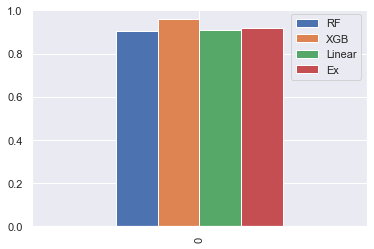

In [194]:
results_df = pd.DataFrame({'RF':[rf1], 'XGB': [xg1], 'Linear': [li1], 'Ex':[dt1]})
results_df.plot(y=["RF", "XGB","Linear","Ex"], kind="bar",)

In [190]:
li=lr.score(X_test, y_test)
xg=reg.score(X_test, y_test)
rf=reg1.score(X_test, y_test)
dt=et.score(X_test, y_test)

In [191]:
results_df = pd.DataFrame({'RF':[rf], 'XGB': [xg], 'Linear': [li], 'DT':[dt]})

<AxesSubplot:>

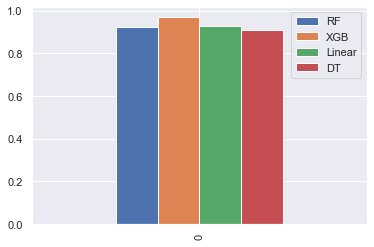

In [192]:
results_df.plot(y=["RF", "XGB","Linear","DT"], kind="bar",)

In [428]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean


In [616]:
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []

# List to maintain the different values of alpha
alpha = []

# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
	ridgeModel = Ridge(alpha = i * 0.25)
	ridgeModel.fit(X_train, y_train)
	scores = cross_val_score(ridgeModel, X, y, cv = 10)
	avg_cross_val_score = mean(scores)*100
	cross_val_scores_ridge.append(avg_cross_val_score)
	alpha.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
	print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))


0.25 : 89.33244191125607
0.5 : 89.33428825026508
0.75 : 89.33584762016486
1.0 : 89.33717674448268
1.25 : 89.33831966385138
1.5 : 89.33931091262085
1.75 : 89.3401778160759
2.0 : 89.3409421738457


In [617]:
# Predicting over the Train Set and calculating error
redge = ridgeModel.predict(X_train)
lk = mae(redge, y_train)
print('Training Mean Absolute Error', lk)


Training Mean Absolute Error 13720.223878758301


In [618]:
# Predicting over the Test Set and calculating error
redT = ridgeModel.predict(X_test)
lT = mae(redT, y_test)
print('Test Mean Absolute Error', lT)

Test Mean Absolute Error 16020.18235973906


In [619]:
np.sqrt(mean_squared_error(y_test,redT))

20520.85393346302

In [450]:
ridgeModel.score(X_train,y_train)

0.9128789990001795

In [451]:
ridgeModel.score(X_test,y_test)

0.9110316026484068

In [460]:
df.corr()['SalePrice'].sort_values()

Exter Qual        -0.671224
Bsmt Qual         -0.625727
Kitchen Qual      -0.612996
Garage Finish     -0.580429
Heating QC        -0.479549
Garage Type       -0.391513
Bsmt Exposure     -0.315091
Lot Shape         -0.285709
Enclosed Porch    -0.242995
Neighborhood      -0.224876
Overall Cond      -0.211803
Mas Vnr Type      -0.130347
Heating           -0.086056
Bsmt Half Bath    -0.072653
BsmtFin Type 1    -0.070318
BsmtFin SF 2      -0.063616
Sale Type         -0.058701
Misc Val          -0.054667
Lot Config        -0.027510
Yr Sold           -0.008751
Land Slope        -0.003431
Low Qual Fin SF   -0.001500
Pool Area         -0.001404
3Ssn Porch        -0.001153
Land Contour       0.003075
Roof Matl          0.003557
Condition 2        0.034036
Mo Sold            0.049143
Screen Porch       0.058366
Street             0.074330
BsmtFin Type 2     0.080890
House Style        0.097205
Bsmt Cond          0.103613
Fireplace Qu       0.108278
Bldg Type          0.146977
MS SubClass        0

In [ ]:
df4.drop('Utilities',inplace=True,axis=1)

df4.drop('Kitchen AbvGr',inplace=True,axis=1)

df4.drop('Heating',inplace=True,axis=1)

df4.drop('Bsmt Half Bath',inplace=True,axis=1)
df4.drop('BsmtFin Type 1',inplace=True,axis=1)

df4.drop('BsmtFin Type 2',inplace=True,axis=1)
df4.drop('Sale Type',inplace=True,axis=1)

df4.drop('Misc Val',inplace=True,axis=1)
df4.drop('Lot Config',inplace=True,axis=1)

df4.drop('Yr Sold',inplace=True,axis=1)

df4.drop('Land Slope',inplace=True,axis=1)
df4.drop('Low Qual Fin SF',inplace=True,axis=1)
df4.drop('Pool Area',inplace=True,axis=1)
#df4.drop('3Ssn Porch ',inplace=True,axis=1)

df4.drop('Land Contour',inplace=True,axis=1)
df4.drop('Roof Matl',inplace=True,axis=1)
df4.drop('Condition 2',inplace=True,axis=1)


# Ensemble Technique

In [148]:
def model_predictions(model, train_x, train_y, test_x):
    
    #train the model
    model.fit(train_x,train_y)
    
    #storing predictions for train and test
    pred_train=model.predict(train_x)
    pred_test=model.predict(test_x)
    return pred_train, pred_test

In [149]:
#Model 1 - Decision Tree
DT=DecisionTreeRegressor(random_state= 101)
M1_train, M1_test = model_predictions(DT, X_train, y_train, X_test)

In [150]:
#Model 2 - Logistic Regression
LR=LinearRegression()
M2_train, M2_test = model_predictions(LR, X_train, y_train, X_test)

In [151]:
xg = ensemble.GradientBoostingRegressor()
M3_train, M3_test = model_predictions(xg, X_train, y_train, X_test)

In [152]:
#Creating a New train dataframe
train_prediction = {
              'DT': M1_train,
              'LR': M2_train,
              'xg': M3_train
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

,DT,LR,xg
0,137500.0,135339.946036,140088.401008
1,225000.0,219966.639700,219121.336325
2,210000.0,231098.414850,221557.805292
3,185000.0,196396.224879,182762.576714
4,271000.0,280088.148731,282037.223812


In [154]:
#Creating a New test dataframe
test_prediction = {
              'DT': M1_test,
              'LR': M2_test,
              'Xg': M3_test
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

,DT,LR,Xg
0,197000.0,192914.048054,195228.545312
1,113000.0,102691.920748,104469.747452
2,117250.0,143583.008702,128165.145368
3,204750.0,224987.832610,217496.770041
4,104000.0,127017.044210,127479.629230


In [174]:
# Stacker Model
model = ensemble.GradientBoostingRegressor()
model.fit(train_predictions, y_train)
model.score(test_predictions,y_test)

0.7923557339917698

In [169]:
model = ensemble.ExtraTreesRegressor()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

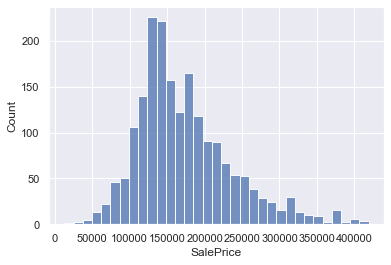

In [195]:
sns.histplot(df4['SalePrice'])
